*PHASE1*

In [ ]:
import os

In [18]:
lineData = ''
with open('./dataset/set-0/reversed_test_data.csv') as f:
    lineData = f.readlines()


['20090105,9.57,9.74,9.51,9.71,9.46,340827.18\n', '20090106,9.8,10.43,9.73,10.3,9.71,635330.35\n', '20090107,10.2,10.4,9.99,9.99,10.3,611960.35\n', '20090108,9.75,9.76,9.5,9.6,9.99,392572.46\n', '20090109,9.6,9.93,9.6,9.85,9.6,604457.27\n', '20090112,9.78,10.08,9.67,9.86,9.85,415480.41\n', '20090113,8.88,9.63,8.88,9.47,9.86,1730707.99\n', '20090114,9.3,10.25,9.3,10.2,9.47,765324.72\n', '20090115,10.01,10.6,9.97,10.3,10.2,895014.39\n', '20090116,10.34,10.94,10.34,10.62,10.3,664370.35\n', '20090119,10.65,11.35,10.65,11.11,10.62,936334.87\n', '20090120,11.07,11.4,11.02,11.36,11.11,472974.73\n', '20090121,11.15,12.2,11.0,11.79,11.36,824455.96\n', '20090122,11.8,12.0,11.4,11.79,11.79,469409.62\n', '20090123,11.58,11.93,11.58,11.64,11.79,345712.54\n', '20090202,11.76,11.99,11.51,11.66,11.64,329749.37\n', '20090203,11.66,12.06,11.6,11.95,11.66,368640.28\n', '20090204,12.02,13.15,12.02,13.04,11.95,540951.65\n', '20090205,13.07,13.2,12.63,12.8,13.04,373428.47\n', '20090206,12.82,13.44,12.82,13.

In [16]:
class DatePrice:
    def __init__(self) -> None:
        pass

    def setData(self, lineData: str) -> None:
        dataList = lineData.strip().split(',')
        self.date = dataList[0]
        self.open = float(dataList[1])
        self.high = float(dataList[2])
        self.low = float(dataList[3])
        self.close = float(dataList[4])
        self.preClose = float(dataList[5])
        self.vol = float(dataList[6])


In [8]:
lineData.strip().split(',')[0]

'20090105'

In [15]:
dp = DatePrice()
dp.setData(lineData)
dp.check()

20090105 9.57


In [2]:
import pandas as pd
from feature.formula import *

file_path = './dataset/set-0/reversed_test_data.csv'
# Define column names
column_names = ["date", "open", "high", "low", "close", "preClose", "vol"]
# Read CSV file into a DataFrame
df = pd.read_csv(file_path, header=None, names=column_names)
df['date'] = pd.to_datetime(df["date"], format="%Y%m%d")
# Convert DataFrame to list of dictionaries


In [15]:
rsi = calculate_williams_percent_r(high_values,low_values, close_values, 20)
print(len(rsi),len(close_values))

1130 1130


In [3]:
rsi = calculate_LABELS(close_values)
print(len(rsi),len(close_values))

1130 1130


In [1]:
import os
import pandas as pd
from feature.formula import *


file_path = './dataset/set-0/reversed_test_data.csv'
# Define column names
column_names = ["date", "open", "high", "low", "close", "preClose", "vol"]
# Read CSV file into a DataFrame
df = pd.read_csv(file_path, header=None, names=column_names)
df['date'] = pd.to_datetime(df["date"], format="%Y%m%d")
# Convert DataFrame to list of dictionaries

low_values = df['low'].tolist()
vol_values = df['vol'].tolist()
open_values = df['open'].tolist()
high_values = df['high'].tolist()
close_values = df['close'].tolist()

period = 6

# those with period
RSI = calculate_RSI(close_values, period)
WILLIAMS = calculate_WILLIAMS_PERSENT_R(high_values, low_values, close_values, period)
SMA = calculate_SMA(close_values, period)
EMA = calculate_EMA(close_values, period)
WMA = calculate_WMA(close_values, period)
HMA = calculate_smooth_HMA(close_values, period)

CCI = calculate_CCI(high_values, low_values, close_values, period)
CMO = calculate_CMO(close_values, period)
ROC = calculate_ROC(close_values, period)
DMI = calculate_ADX(high_values, low_values, close_values, period)


# those without a period
TRIPLE_EMA = calculate_triple_EMA(close_values)
MACD = calculate_MACD(close_values)
PPO = calculate_PPO(close_values)
CMF = calculate_CMF(close_values, high_values, low_values, vol_values)
SAR = calculate_SAR(high_values, low_values)

# calculate labels


In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 假设你已经有了这些函数和数据
# RSI = calculate_RSI(close_values, period)
# WILLIAMS = calculate_WILLIAMS_PERSENT_R(high_values, low_values, close_values, period)
# SMA = calculate_SMA(close_values, period)
# EMA = calculate_EMA(close_values, period)
# WMA = calculate_WMA(close_values, period)
# HMA = calculate_smooth_HMA(close_values, period)


# 将列表正态化到范围[-1, 1]
# 将数据合并为DataFrame
data = pd.DataFrame({'RSI': RSI, 'WILLIAMS': WILLIAMS,
                    'SMA': SMA, 'EMA': EMA, 'WMA': WMA, 'HMA': HMA})

# 将float('nan')替换为NaN
data.replace({float('nan'): np.nan}, inplace=True)

# 正态化处理
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(data.dropna())  # 忽略NaN值并进行正态化处理

# 将处理后的数据重新放入DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=data.columns)

# 将数据保存到CSV文件
scaled_data_df.to_csv('normalized_data.csv', index=False)

In [9]:
scaled_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RSI       1124 non-null   float64
 1   WILLIAMS  1124 non-null   float64
 2   SMA       1124 non-null   float64
 3   EMA       1124 non-null   float64
 4   WMA       1124 non-null   float64
 5   HMA       1124 non-null   float64
dtypes: float64(6)
memory usage: 52.8 KB


In [2]:
import os
import pandas as pd
from feature.formula import *
from sklearn.preprocessing import MinMaxScaler

file_path = './dataset/set-0/reversed_test_data.csv'
# Define column names
column_names = ["date", "open", "high", "low", "close", "preClose", "vol"]
# Read CSV file into a DataFrame
df = pd.read_csv(file_path, header=None, names=column_names)
df['date'] = pd.to_datetime(df["date"], format="%Y-%m-%d")
# Convert DataFrame to list of dictionaries

low_values = df['low'].tolist()
vol_values = df['vol'].tolist()
open_values = df['open'].tolist()
high_values = df['high'].tolist()
close_values = df['close'].tolist()


start = 6
end = 21
data = pd.DataFrame()
data_name_list = ['RSI', 'WILLIANMS', 'SMA', 'EMA', 'WMA', 'HMA',
                  'TEMA', 'CCI', 'CMO', 'MACD', 'PPO', 'ROC', 'CMF', 'DMI', 'SAR']

for period in range(start, end):
    # those with period
    RSI = calculate_RSI(close_values, period)
    WILLIAMS = calculate_WILLIAMS_PERSENT_R(
        high_values, low_values, close_values, period)
    SMA = calculate_SMA(close_values, period)
    EMA = calculate_EMA(close_values, period)
    WMA = calculate_WMA(close_values, period)
    HMA = calculate_smooth_HMA(close_values, period)

    CCI = calculate_CCI(high_values, low_values, close_values, period)
    CMO = calculate_CMO(close_values, period)
    ROC = calculate_ROC(close_values, period)
    DMI = calculate_ADX(high_values, low_values, close_values, period)

    # those without a period
    TEMA = calculate_triple_EMA(close_values)
    MACD = calculate_MACD(close_values)
    PPO = calculate_PPO(close_values)
    CMF = calculate_CMF(close_values, high_values, low_values, vol_values)
    SAR = calculate_SAR(high_values, low_values)

    data['RSI-{}'.format(period)] = RSI
    data['WILLIANMS-{}'.format(period)] = WILLIAMS
    data['SMA-{}'.format(period)] = SMA
    data['EMA-{}'.format(period)] = EMA
    data['WMA-{}'.format(period)] = WMA
    data['HMA-{}'.format(period)] = HMA
    data['TEMA-{}'.format(period)] = TEMA
    data['CCI-{}'.format(period)] = CCI
    data['CMO-{}'.format(period)] = CMO
    data['MACD-{}'.format(period)] = MACD
    data['PPO-{}'.format(period)] = PPO
    data['ROC-{}'.format(period)] = ROC
    data['CMF-{}'.format(period)] = CMF
    data['DMI-{}'.format(period)] = DMI
    data['SAR-{}'.format(period)] = SAR

# calculate labels
LABELS = calculate_LABELS(close_values)


# set the data order
order = ['LABELS', 'PRICE']
for index in data_name_list:
    for i in range(start, end):
        order.append('{}-{}'.format(index, i))

# 将float('nan')替换为NaN
data.replace({float('nan'): np.nan}, inplace=True)
data['LABELS'] = LABELS
data['PRICE'] = close_values
data = data.dropna()

verbose_info = pd.DataFrame(data, columns= ['LABELS', 'PRICE'])
verbose_info = verbose_info.reset_index(drop=True)
# 正态化处理
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(data)  # 进行正态化处理

# 将处理后的数据重新放入DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data_df['LABELS'] = verbose_info['LABELS']
scaled_data_df['PRICE'] = verbose_info['PRICE']
scaled_data_df = scaled_data_df[order]
# 将数据保存到CSV文件
scaled_data_df.round(2).to_csv('normalized_data.csv', index=False, header=None)



C:\Users\HX\AppData\Local\Temp\ipykernel_18928\3183692214.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['PPO-{}'.format(period)] = PPO
C:\Users\HX\AppData\Local\Temp\ipykernel_18928\3183692214.py:60: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['ROC-{}'.format(period)] = ROC
C:\Users\HX\AppData\Local\Temp\ipykernel_18928\3183692214.py:61: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns

In [12]:
'./dataset/set-{}/reversed_test_data.csv'.split('/')[-1].split('_')[-2]

'test'

In [28]:
len(SMA)

244

In [16]:
data.head()

,RSI-6,WILLIANMS-6,SMA-6,EMA-6,WMA-6,HMA-6,TEMA-6,CCI-6,CMO-6,MACD-6,PPO-6,ROC-6,CMF-6,DMI-6,SAR-6,LABELS,PRICE
33,50.000000,-66.000000,14.170000,14.159709,14.088571,14.106984,12.890461,-62.207632,16.923077,-0.187871,8.504875,0.000000,0.141147,53.727835,12.98000,0.0,14.00
34,50.802139,-82.333333,14.180000,13.974078,14.297143,14.299048,13.115097,-63.321931,-3.370787,-0.239789,7.600960,0.446097,0.154550,48.188434,14.20000,0.0,13.51
35,62.295082,-38.333333,14.380000,14.218627,14.511429,14.246508,13.616118,47.582502,-4.545455,-0.186620,7.565889,8.804109,0.134211,47.663213,13.35000,0.0,14.83
36,52.083333,-27.666667,14.406667,14.484734,14.344762,13.576984,13.755302,165.802113,0.000000,-0.133765,7.622185,1.067378,0.198787,49.681638,13.44600,0.0,15.15
37,47.916667,-27.436823,14.380000,14.629095,14.124762,13.165397,13.726215,86.652079,47.791165,-0.114204,7.477230,-1.056106,0.190380,51.655625,13.53816,1.0,14.99


In [21]:
verbose_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LABELS  5 non-null      float64
 1   PRICE   5 non-null      float64
dtypes: float64(2)
memory usage: 208.0 bytes


In [22]:
verbose_info = pd.DataFrame(data, columns= ['LABELS', 'PRICE'])
verbose_info = verbose_info.reset_index(drop=True)
# 正态化处理
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(data)  # 进行正态化处理

# 将处理后的数据重新放入DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data_df['LABELS'] = verbose_info['LABELS']
scaled_data_df['PRICE'] = verbose_info['PRICE']
scaled_data_df = scaled_data_df[order]
# 将数据保存到CSV文件
scaled_data_df.round(2).to_csv('normalized_data.csv', index=False)

In [10]:
scaled_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LABELS       1064 non-null   float64
 1   PRICE        1064 non-null   float64
 2   RSI-6        1097 non-null   float64
 3   WILLIANMS-6  1097 non-null   float64
 4   SMA-6        1097 non-null   float64
 5   EMA-6        1097 non-null   float64
 6   WMA-6        1097 non-null   float64
 7   HMA-6        1097 non-null   float64
 8   TEMA-6       1097 non-null   float64
 9   CCI-6        1097 non-null   float64
 10  CMO-6        1097 non-null   float64
 11  MACD-6       1097 non-null   float64
 12  PPO-6        1097 non-null   float64
 13  ROC-6        1097 non-null   float64
 14  CMF-6        1097 non-null   float64
 15  DMI-6        1097 non-null   float64
 16  SAR-6        1097 non-null   float64
dtypes: float64(17)
memory usage: 145.8 KB


In [13]:
scaled_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RSI-6        1097 non-null   float64
 1   WILLIANMS-6  1097 non-null   float64
 2   SMA-6        1097 non-null   float64
 3   EMA-6        1097 non-null   float64
 4   WMA-6        1097 non-null   float64
 5   HMA-6        1097 non-null   float64
 6   TEMA-6       1097 non-null   float64
 7   CCI-6        1097 non-null   float64
 8   CMO-6        1097 non-null   float64
 9   MACD-6       1097 non-null   float64
 10  PPO-6        1097 non-null   float64
 11  ROC-6        1097 non-null   float64
 12  CMF-6        1097 non-null   float64
 13  DMI-6        1097 non-null   float64
 14  SAR-6        1097 non-null   float64
dtypes: float64(15)
memory usage: 128.7 KB


In [15]:
scaled_data_df.round(2).to_csv('normalized_data.csv', index=False, header=None)

In [14]:
train_path = './dataset/set-0/output_phase2_train.csv'

train_df = pd.read_csv(train_path, header=None, index_col=None, delimiter=',')


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Columns: 227 entries, 0 to 226
dtypes: float64(227)
memory usage: 1.9 MB


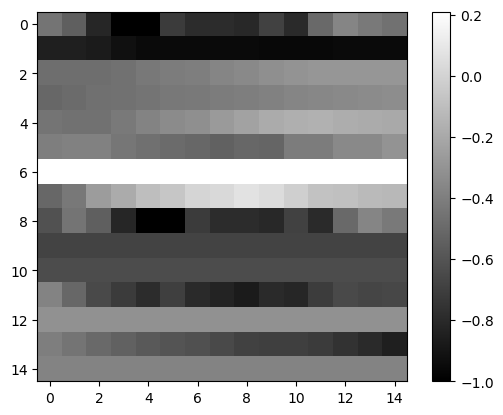

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 数据
data = [-0.45,-0.55,-0.82,-1.0,-1.0,-0.72,-0.79,-0.79,-0.81,-0.69,-0.8,-0.5,-0.37,-0.42,-0.46,
        -0.85,-0.85,-0.87,-0.92,-0.95,-0.95,-0.95,-0.95,-0.95,-0.96,-0.96,-0.96,-0.95,-0.95,-0.95,
        -0.48,-0.48,-0.48,-0.46,-0.43,-0.41,-0.4,-0.37,-0.35,-0.32,-0.3,-0.29,-0.29,-0.29,-0.29,
        -0.51,-0.49,-0.47,-0.46,-0.45,-0.43,-0.42,-0.41,-0.4,-0.39,-0.37,-0.36,-0.35,-0.34,-0.33,
        -0.45,-0.46,-0.46,-0.42,-0.38,-0.34,-0.32,-0.27,-0.23,-0.19,-0.17,-0.16,-0.18,-0.19,-0.2,
        -0.4,-0.39,-0.39,-0.44,-0.47,-0.49,-0.51,-0.54,-0.51,-0.52,-0.41,-0.41,-0.35,-0.35,-0.3,
        0.21,0.21,0.21,0.21,0.21,0.21,0.21,0.21,0.21,0.21,0.21,0.21,0.21,0.21,0.21,
        -0.51,-0.43,-0.26,-0.19,-0.1,-0.06,0.01,0.03,0.07,0.04,-0.02,-0.08,-0.09,-0.12,-0.13,
        -0.61,-0.45,-0.55,-0.82,-1.0,-1.0,-0.72,-0.79,-0.79,-0.81,-0.69,-0.8,-0.5,-0.37,-0.42,
        -0.68,-0.68,-0.68,-0.68,-0.68,-0.68,-0.68,-0.68,-0.68,-0.68,-0.68,-0.68,-0.68,-0.68,-0.68,
        -0.64,-0.64,-0.64,-0.64,-0.64,-0.64,-0.64,-0.64,-0.64,-0.64,-0.64,-0.64,-0.64,-0.64,-0.64,
        -0.38,-0.51,-0.65,-0.72,-0.79,-0.7,-0.8,-0.83,-0.87,-0.8,-0.82,-0.71,-0.65,-0.67,-0.66,
        -0.31,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,
        -0.4,-0.45,-0.5,-0.54,-0.57,-0.6,-0.62,-0.65,-0.69,-0.7,-0.7,-0.72,-0.76,-0.8,-0.85,
        -0.38,-0.38,-0.38,-0.38,-0.38,-0.38,-0.38,-0.38,-0.38,-0.38,-0.38,-0.38,-0.38,-0.38,-0.38]

# 将数据转换为15*15的矩阵
matrix_data = np.array(data).reshape(15, 15)

# 绘制灰度图
plt.imshow(matrix_data, cmap='gray')
plt.colorbar()
plt.show()
